**Problem Statement**

The problem is to detect wheather a given image of a Cotton Leaf or Cotton Plant is infected or is fine.
if we can make a machine learning model then we can save a lot of human effort by detecting in advance which cotton leaves or plants are fine and which are not, we can do this by using drones to capture images automatically and then process it by machine learning model.
Thus using technology in a createive way.

**Dataset**

The dataset contains thousands of images of all 4 categories namely diseased cotton leaf, diseased cotton plant, fresh cotton leaf and fresh cotton plant, thus the model should have a good accuracy.


**Technology used**

For this problem we will be using Transfer Learning with ImageDataGenerator.
Generally VGG16 and VGG19 gives the best accuracy, but here we will be using Inception V3, as it is light and faster and giving better accuracy.
This project is done in Tensorflow 2.3

#Step 1 - Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

# Step 2 - Defining some variables, path and constants

In [2]:
train_path = '/content/drive/My Drive/Data Science Projects/dataset_cotton/train'
validation_path = '/content/drive/My Drive/Data Science Projects/dataset_cotton/val'

IMAGE_SIZE = [264, 264] 
BATCH_SIZE = 128        
NO_OF_TRAIN_IMAGES = 1951
NO_OF_TEST_IMAGES = 324

# Step 3 - Creating Image Data Generator

In [4]:
train_gen = ImageDataGenerator (
              rotation_range = 20, 
              width_shift_range = 0.1,
              height_shift_range = 0.1,
              shear_range = 0.1, 
              zoom_range = 0.2,
              horizontal_flip = True, 
              preprocessing_function = preprocess_input    
              ) 
test_gen = ImageDataGenerator( preprocessing_function = preprocess_input)

train_set = train_gen.flow_from_directory(train_path, shuffle = True, target_size = IMAGE_SIZE, batch_size = BATCH_SIZE)
test_set = train_gen.flow_from_directory(validation_path, target_size = IMAGE_SIZE, batch_size = BATCH_SIZE)

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


# Step 4 - Setting up pretrained model

In [5]:
inceptionv3 = InceptionV3(input_shape = IMAGE_SIZE+[3], weights = 'imagenet', include_top = False)  #Default Image size with 3D layer of RGB, weights from imagenet and not inluding top layer as we will be making it manually
inceptionv3.trainable = False                                                                 #To freeze the weights of model

87916544/87910968 [==============================] - 1s 0us/step


# Step 5 - Creating top layer and training the model



In [6]:
x = Flatten()(inceptionv3.output)
x = Dense(4, activation = 'softmax' )(x)

model = Model(inputs = inceptionv3.input, outputs = x)
model.summary()

model.compile (optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

his = model.fit(train_set, validation_data = test_set, epochs = 25,
                            steps_per_epoch= 12)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 264, 264, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 131, 131, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 131, 131, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 131, 131, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

# Step 6 - Plotting Loss and Accuracy

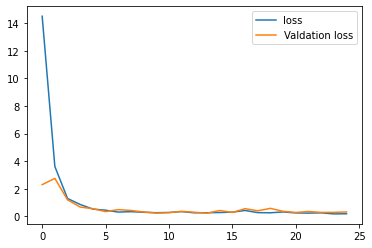

In [7]:
#Plotting Loss

plt.plot(his.history['loss'], label = 'loss')
plt.plot(his.history['val_loss'], label = 'Valdation loss')
plt.legend()



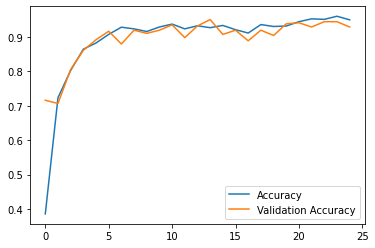

In [8]:
# Plot accuracy per iteration

plt.plot(his.history['accuracy'], label='Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Step 7 - Saving the model

In [ ]:
model.save_weights('model', save_format = 'h5') # Saving model weights

import json

with open('model_config.json', 'w') as file:
  file.write(model.to_json())                   # Saving model config file

# Step 8 - Predicting a single image to check the model

In [9]:
# Predicted a singe Image

test_image = image.load_img('/content/drive/My Drive/Data Science Projects/test2.jpg', target_size = (264, 264))
test_image = image.img_to_array(test_image)
test_image = preprocess_input(test_image)
test_image = np.expand_dims(test_image, axis=0) #Since model expects a batch dimension
                                                #which is the first dimension of image

result = model.predict(test_image)
print(result)
result = result.argmax(axis = 1)[0]

if(result==0):
  print('Its a Diseased Cotton Leaf')
elif(result == 1):
  print('Its Diseased Cotton Plant')
elif(result == 2):
  print('Its Fresh Cotton Leaf')
else:
  print('Its Fresh Cotton Plant')

[[1.0000000e+00 8.4116732e-21 6.7664646e-13 1.6326982e-12]]
Its a Diseased Cotton Leaf


**Conclusion**

The model gives approximately 93% accuracy which is a very good accuracy for this kind of problem, thus the model is successful.

